# Financial Planning with APIs and Simulations

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18933431,
            "id": 1,
            "last_updated": 1642548275,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 804957683686,
                    "percent_change_1h": 0.348650686653509,
                    "percent_change_24h": 0.634774346717207,
                    "percent_change_7d": 1.50797367564718,
                    "percentage_change_1h": 0.348650686653509,
                    "percentage_change_24h": 0.634774346717207,
                    "percentage_change_7d": 1.50797367564718,
                    "price": 42501.0,
                    "volume_24h": 18910428876
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18933431,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119216539,
            "id": 1027,
            "last_updated": 1642548214,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 378522414610,
                    "percent_change_1h": 0.11908151550756,
                    "percent_change_24h": -1.43817683616519,
                    "percent_change_7d": 2.76960717058358,
                    "percentage_change_1h": 0.11908151550756,
                    "percentage_change_24h": -1.43817683616519,
                    "percentage_change_7d": 2.76960717058358,
                    "price": 3172.22,
                    "volume_24h": 12729703433
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119216539,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"Current price of BTC is {btc_price}")

Current price of BTC is 42501.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"Current price of ETH is {eth_price}")

Current price of ETH is 3172.22


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"Current value of the holdings in BTC is {btc_value: .2f}")

Current value of the holdings in BTC is  51001.20


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"Current value of the holdings in ETH is {eth_value: .2f}")

Current value of the holdings in ETH is  16812.77


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"Current cryptocurrency wallet balance is {total_crypto_wallet: .2f}")

Current cryptocurrency wallet balance is  67813.97


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: In the current folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AGG","SPY"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the the Alpaca DataFrame
df_portfolio.head()

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print the AGG closing price
print (f"The AGG closing price is {agg_close_price}.")

The AGG closing price is 119.445.


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print the SPY closing price
print (f"The SPY closing price is {spy_close_price}.")

The SPY closing price is 334.55.


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is {agg_value}.")

The current value of the bond portfolio is 23889.0.


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is {spy_value}.")

The current value of the stock portfolio is 36800.5.


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Total value of bonds and stocks is {total_stocks_bonds}.")

Total value of bonds and stocks is 60689.5.


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"Total value of portfolio: {total_portfolio}.")

Total value of portfolio: 128503.466.


### Evaluate the Emergency Fund

#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(f"Python list savings_data: {savings_data}")

Python list savings_data: [67813.966, 60689.5]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index=["crypto","stock/bond"])

# Display the savings_df DataFrame
savings_df

,amount
crypto,67813.966
stock/bond,60689.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"The total value of the member's portfolio"}, ylabel='amount'>

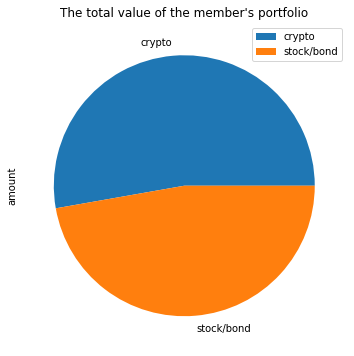

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount", figsize=(6, 6), title="The total value of the member's portfolio")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulating! You have enough money in this fund!")
elif total_portfolio == emergency_fund_value:
    print("Congratulating! You are close to your financial goal!")
else:
    print(f"You are in {emergency_fund_value - total_portfolio} away from your financial goal.")

Congratulating! You have enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# An end date of 2020-08-07 and work 3 years back from that date
start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_row = 1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = limit_row
).df

# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())

AGG                                       \
                             open    high       low     close   volume   
time                                                                     
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467   

                              SPY                                     
                             open    high     low    close    volume  
time                                                                  
2017-08-07 00:00:00-04:00  247.49  247.87  247.37  247.850  20901988  
2017-08-08 00:00:00-04:00  247.51  248.91  246.83  247.291  44619069  
2017-08-09 00:00:00-04:00  246.47  247.31  246.06  247.230  48543032  
2017-08-10 00:00:00-04:00  246.28  246.44  243.70  243.790  87857827  
2017-08-11 00:00:00-04:00  244.02  244.80  243.75  244.110  56404847

AGG                                       \
                             open    high       low    close    volume   
time                                                                     
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.400  24615464   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.400  34239733   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.580   9021388   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.445   8830420   

                                SPY                                    
                               open    high     low   close    volume  
time                                                                   
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  89861354  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72941562  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76988181  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30_years = MCSimulation(
  portfolio_data = prices_df,
  weights = [.40, .60],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Review the simulation input data
MC_30_years.portfolio_data.head()

AGG                                       \
                             open    high       low     close   volume   
time                                                                     
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-08-07 00:00:00-04:00          NaN  247.49  247.87  247.37  247.850   
2017-08-08 00:00:00-04:00    -0.000948  247.51  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.47  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.28  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.02  244.80  243.75  244.110   

                                                  
                             volume daily_return  
time                                              
2017-08-07 00:00:00-04:00  20901988          NaN  
2017-08-08 00:00:00-04:00  44619069    -0.002255  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999426,1.004705,1.002778,0.996206,1.003298,0.994476,0.999451,1.015806,1.006680,0.996741,...,0.993173,1.003082,1.002800,1.004734,1.001973,1.001310,0.997604,1.011532,0.998305,0.993400
2,1.008792,1.001043,1.004053,1.003206,1.002917,1.000178,1.007430,1.027941,1.027990,1.001049,...,0.989759,1.028199,0.986789,1.013293,0.999619,0.991256,1.016509,1.004607,0.995748,0.997692
3,1.006098,0.991862,0.998339,1.017030,0.998260,1.006380,0.993802,1.030501,1.024738,1.009689,...,1.003710,1.016429,0.996219,1.017752,0.984424,0.976708,1.019197,0.996138,0.995065,0.984593
4,1.024014,0.982065,0.997565,1.029197,0.994638,1.007132,1.001928,1.021368,1.024331,1.011115,...,1.005059,1.009400,0.997947,1.011998,0.978485,0.964235,1.019951,1.005944,0.971955,0.981785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.185175,19.592124,3.124807,14.988710,1.755490,11.109930,2.765153,37.558229,24.261017,7.625750,...,9.164027,33.644793,7.574913,36.613425,44.856171,6.825315,5.303538,42.598923,6.924624,20.587299
7557,4.171911,19.437301,3.122694,14.833554,1.759062,11.063048,2.782579,36.825754,24.315569,7.530248,...,9.137756,33.656301,7.517968,37.302148,44.965903,6.778817,5.300649,42.380570,6.985157,20.422413
7558,4.117604,19.706074,3.105129,14.909991,1.759455,11.318387,2.777689,36.427946,24.633407,7.704735,...,9.060004,34.072693,7.460316,37.514039,45.232932,6.712943,5.412776,42.389635,6.941185,20.255238
7559,4.107892,19.624447,3.112767,15.248304,1.759252,11.400132,2.772266,36.569073,24.724931,7.630920,...,8.979968,34.018850,7.531395,37.970528,45.330967,6.763448,5.399909,42.824752,6.871057,20.426617


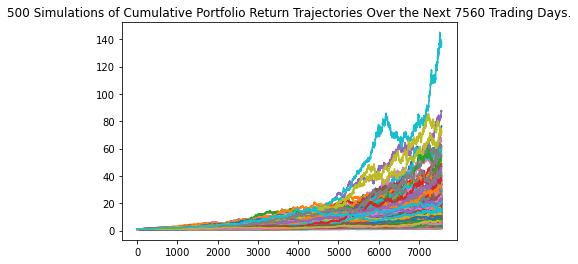

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot_30 = MC_30_years.plot_simulation()

# Save the plot for future use
MC_sim_line_plot_30.get_figure().savefig("Images/MC_30years_sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

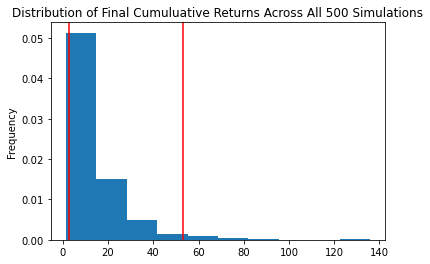

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot_30 = MC_30_years.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot_30.get_figure().savefig('Images/MC_30years_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_30_years.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean             14.413283
std              13.402774
min               1.331930
25%               6.647846
50%              10.178454
75%              16.926083
max             135.874491
95% CI Lower      2.531332
95% CI Upper     53.103226
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Total balance of the stock/bond portfolio is {total_stocks_bonds}.")

Total balance of the stock/bond portfolio is 60689.5.


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_95_lower_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_95_upper_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"The lower `95%` confidence outcome is {ci_95_lower_cumulative_return: .2f}")
print(f"The upper `95%` confidence outcome is {ci_95_upper_cumulative_return: .2f}")

The lower `95%` confidence outcome is  153625.29
The upper `95%` confidence outcome is  3222808.22


### Forecast Cumulative Returns in 10 Years


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10_years = MCSimulation(
  portfolio_data = prices_df,
  weights = [.20, .80],
  num_simulation = 500,
  num_trading_days = 252*10
)

# Review the simulation input data
MC_10_years.portfolio_data.head()

AGG                                       \
                             open    high       low     close   volume   
time                                                                     
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-08-07 00:00:00-04:00          NaN  247.49  247.87  247.37  247.850   
2017-08-08 00:00:00-04:00    -0.000948  247.51  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.47  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.28  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.02  244.80  243.75  244.110   

                                                  
                             volume daily_return  
time                                              
2017-08-07 00:00:00-04:00  20901988          NaN  
2017-08-08 00:00:00-04:00  44619069    -0.002255  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008541,0.998816,0.976312,1.008507,1.010530,0.994817,1.004083,1.006507,0.998220,1.003162,...,1.004737,0.986808,1.018550,0.997772,0.990404,1.001844,1.008035,1.015235,1.001303,1.018476
2,0.994266,1.009528,0.970290,1.014126,0.999823,0.992660,1.009115,1.020700,0.999935,1.000692,...,1.012287,0.999737,1.006452,0.992604,0.994394,1.000163,1.003535,0.987274,0.983055,1.020577
3,1.005383,1.001941,0.986847,1.005182,1.002148,0.979989,0.995870,1.014129,0.983328,1.005566,...,1.012096,0.998237,1.000262,0.991793,0.976800,1.009341,1.003481,0.999783,0.963422,1.030106
4,0.998143,0.993351,0.982252,1.008533,1.005795,0.974133,0.998364,1.019287,0.992608,1.006428,...,1.027949,1.000019,0.999083,0.983932,0.985428,1.018756,1.007489,1.017654,0.980885,1.032968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.634683,1.422968,0.875940,1.370012,2.621089,1.068965,2.743250,6.307346,3.167735,4.623279,...,2.079970,0.868895,3.614716,1.751029,2.265880,4.810102,1.864010,1.320429,4.132275,5.012864
2517,3.590136,1.404459,0.866796,1.377859,2.622292,1.074960,2.804238,6.266005,3.125232,4.620618,...,2.091081,0.869441,3.576647,1.749671,2.258694,4.893936,1.860303,1.331952,4.097021,4.915718
2518,3.591021,1.437709,0.860780,1.404462,2.629075,1.072659,2.851237,6.397560,3.163210,4.661115,...,2.114046,0.870178,3.615497,1.774115,2.305534,4.902650,1.886852,1.344889,4.069853,4.863991
2519,3.633699,1.440979,0.879273,1.387053,2.638197,1.062834,2.852164,6.269288,3.183890,4.728797,...,2.093142,0.868872,3.555360,1.782627,2.320046,4.864454,1.886088,1.355519,4.080986,4.917304


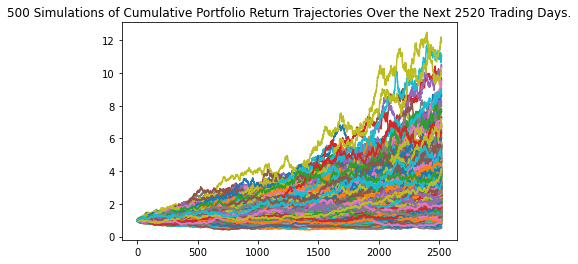

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot_10 = MC_10_years.plot_simulation()

# Save the plot for future use
MC_sim_line_plot_10.get_figure().savefig("Images/MC_10years_sim_plot.png", bbox_inches="tight")

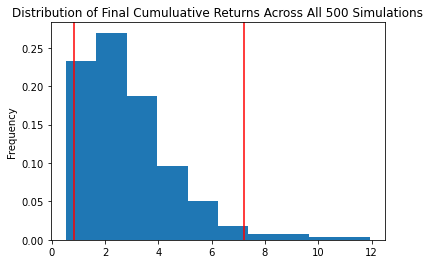

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot_10 = MC_10_years.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot_10.get_figure().savefig('Images/MC_10years_dist_plot.png',bbox_inches='tight')

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics_10 = MC_10_years.summarize_cumulative_return()

# Print summary statistics Series
print(MC_summary_statistics_10)

count           500.000000
mean              2.898530
std               1.722821
min               0.520191
25%               1.627413
50%               2.478205
75%               3.745337
max              11.947980
95% CI Lower      0.839047
95% CI Upper      7.209262
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of the stock is {agg_value} and bond is {spy_value}.Total is {total_stocks_bonds}.")


Current balance of the stock is 23889.0 and bond is 36800.5.Total is 60689.5.


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_95_lower_cumulative_return_10 = MC_summary_statistics_10[8] * total_stocks_bonds
ci_95_upper_cumulative_return_10 = MC_summary_statistics_10[9] * total_stocks_bonds

# Print the result of your calculations
print(f"The lower `95%` confidence outcome is {ci_95_lower_cumulative_return_10: .2f}")
print(f"The upper `95%` confidence outcome is {ci_95_upper_cumulative_return_10: .2f}")

The lower `95%` confidence outcome is  50921.35
The upper `95%` confidence outcome is  437526.48


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?